## **Proyek Machine Learning Terapan - Raffi Dzaky Mahendra**

### **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Load Data**

**Informasi tentang atribut dataset**

[Dataset Link](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset/data)
- Pregnancies: Untuk menyatakan jumlah kehamilan

- Glucose: Untuk mengekspresikan tingkat Glukosa dalam darah

- BloodPresure: Untuk mengekspresikan pengukuran tekanan darah

- SkinThickness: Untuk mengekspresikan ketebalan kulit

- Insulin: Untuk mengekspresikan tingkat Insulin dalam darah

- BMI: Untuk mengekspresikan indeks masa tubuh

- DiabetesPedigreeFunction: untuk mengungkapkan persentase Diabetes

- Age: Untuk mengekspresikan usia

- Outcome: Untuk menyatakan hasil akhir 1 adalah Ya dan 0 adalah Tidak

In [2]:
df = pd.read_csv('dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### **Data Cleaning**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.duplicated().sum()

0

#### Insight
- Semua fitur sudah bertipe numerik
- Tidak ditemukan adanya missing value pada dataset
- Tidak ditemukan adanya duplicate value dalam dataset

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Insight
- Terdapat nilai minimum yang tidak masuk akal (0) pada fitur 'Glucose', 'BloodPresure', 'SkinThickness', 'Insulin', dan 'BMI'

In [7]:
def replace_zero_with_median(df):
    # Buat salinan DataFrame
    df_cleaned = df.copy()
    
    # Daftar fitur dengan nilai 0 yang akan diganti dengan median
    zero_value_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
    
    # Ganti nilai 0 dengan NaN untuk semua fitur yang ditentukan
    df_cleaned[zero_value_features] = df_cleaned[zero_value_features].replace(0, np.nan)
    
    # Untuk setiap fitur, isi NaN berdasarkan median per kelompok outcome
    for feature in zero_value_features:
        # Hitung median untuk setiap kelompok outcome
        median_by_outcome = df_cleaned.groupby('Outcome')[feature].median()
        
        # Isi missing values berdasarkan kelompok
        for outcome in [0, 1]:
            mask = (df_cleaned['Outcome'] == outcome) & (df_cleaned[feature].isna())
            df_cleaned.loc[mask, feature] = median_by_outcome[outcome]
    
    return df_cleaned

In [8]:
def remove_outlier(df):
    # Buat salinan DataFrame
    df_cleaned = df.copy()

    # Daftar fitur yang akan dihilangkan outlier-nya
    columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

    # Simpan jumlah data awal
    initial_rows = len(df_cleaned)

    for column in columns:
        # Hitung Q1, Q3, dan IQR
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Tentukan batas bawah dan atas
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter data dalam range yang ditentukan
        df_cleaned = df_cleaned[
            (df_cleaned[column] >= lower_bound) & 
            (df_cleaned[column] <= upper_bound)
        ]
    
    removed_rows = initial_rows - len(df_cleaned)

    print(f"Jumlah data awal: {initial_rows}")
    print(f"Jumlah data setelah membersihkan outlier: {len(df_cleaned)}")
    print(f"Jumlah data yang dihapus: {removed_rows}")
    print(f"Persentase data yang dihapus: {(removed_rows/initial_rows*100):.2f}%")
    
    return df_cleaned



In [9]:
df_cleaned = replace_zero_with_median(df)
df_cleaned = remove_outlier(df_cleaned)

Jumlah data awal: 768
Jumlah data setelah membersihkan outlier: 582
Jumlah data yang dihapus: 186
Persentase data yang dihapus: 24.22%


In [10]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 582 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               582 non-null    int64  
 1   Glucose                   582 non-null    float64
 2   BloodPressure             582 non-null    float64
 3   SkinThickness             582 non-null    float64
 4   Insulin                   582 non-null    float64
 5   BMI                       582 non-null    float64
 6   DiabetesPedigreeFunction  582 non-null    float64
 7   Age                       582 non-null    int64  
 8   Outcome                   582 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 45.5 KB


#### Insight
- Identifikasi nilai 0 pada kolom 'Glucose', 'BloodPresure', 'SkinThickness', 'Insulin', dan 'BMI'sebagai missing value dan mengganti nilai tersebut dengan median based on 'Outcome' target.
- Penanganan outlier dengan metode IQR

### **Exploratory Data Analysis**

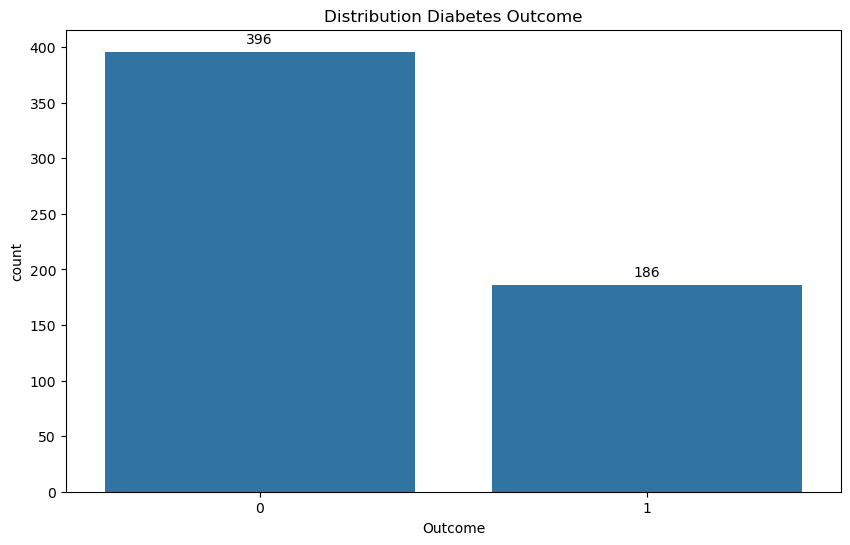

In [11]:
# Distribusi diabetes outcome
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_cleaned, x='Outcome')

# Menambahkan nilai pada grafik
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Distribution Diabetes Outcome')
plt.show()

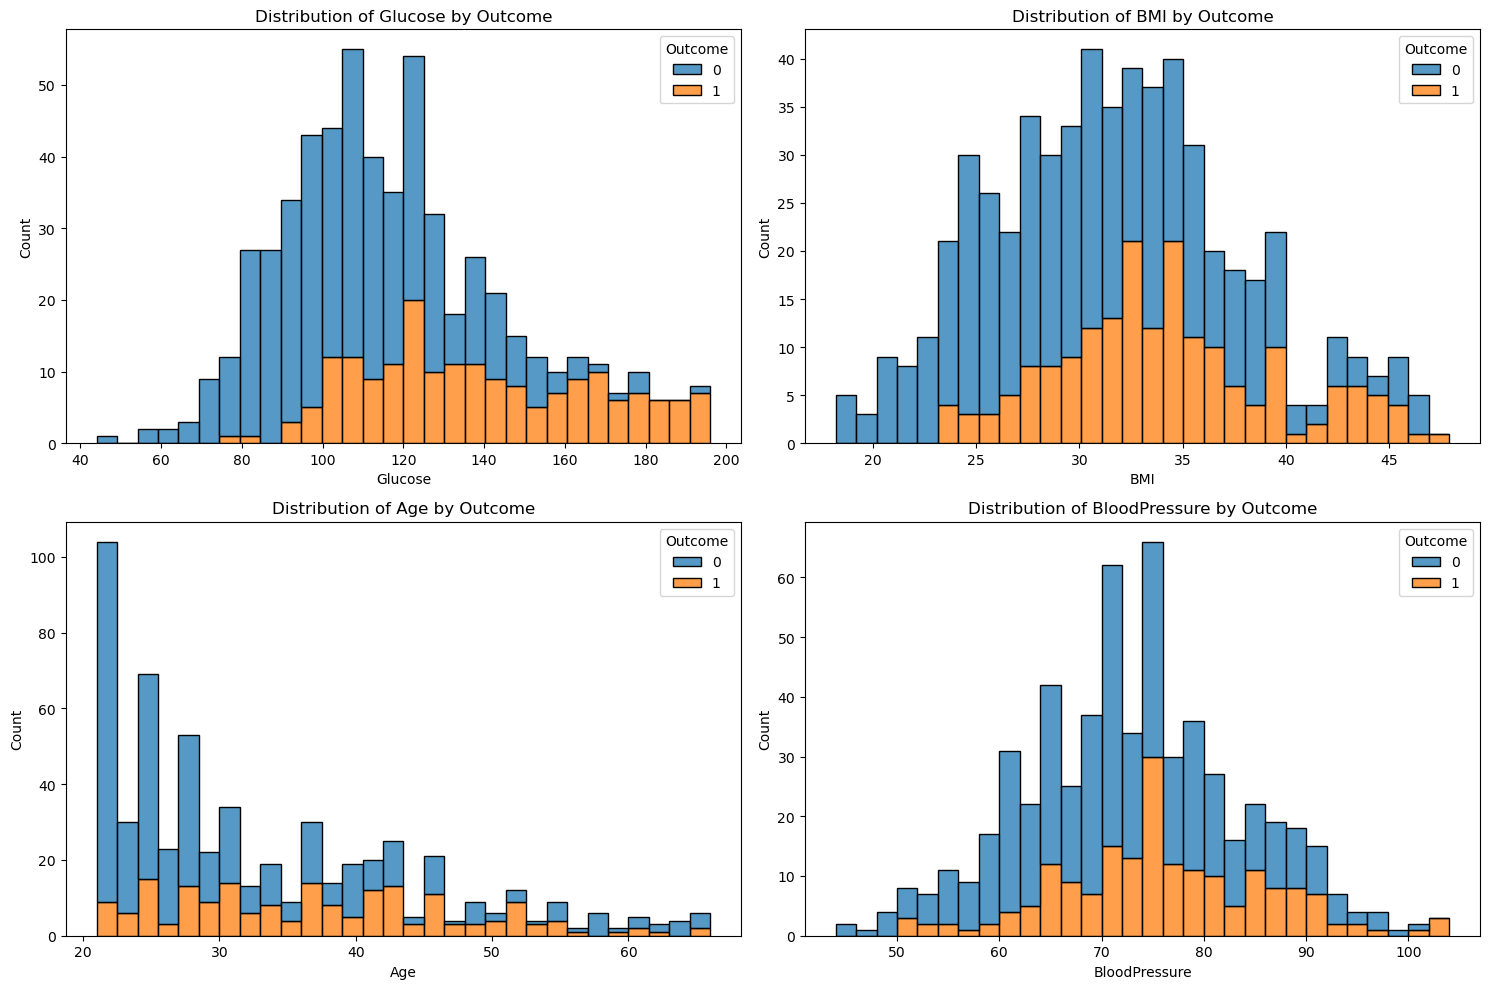

In [12]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(['Glucose', 'BMI', 'Age', 'BloodPressure'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df_cleaned, x=column, hue='Outcome', multiple="stack", bins=30)
    plt.title(f'Distribution of {column} by Outcome')
plt.tight_layout()
plt.show()

### **Data Preparation**

In [13]:
X = df_cleaned.drop(columns='Outcome', axis=1)
y = df_cleaned['Outcome']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")

Jumlah data training: 465
Jumlah data testing: 117


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Model Development**

- Random Forest Model

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [17]:
# Model terbaik
best_model = grid_search.best_estimator_
print("Model Terbaik:")
print(best_model)
print("\n")

Model Terbaik:
RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, random_state=42)




In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prediksi
y_pred = best_model.predict(X_test_scaled)

print("Best Hyperparameters:", grid_search.best_params_)
print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}

Model Performance Metrics:
Accuracy: 0.8889
Precision: 0.8788
Recall: 0.7632
F1 Score: 0.8169


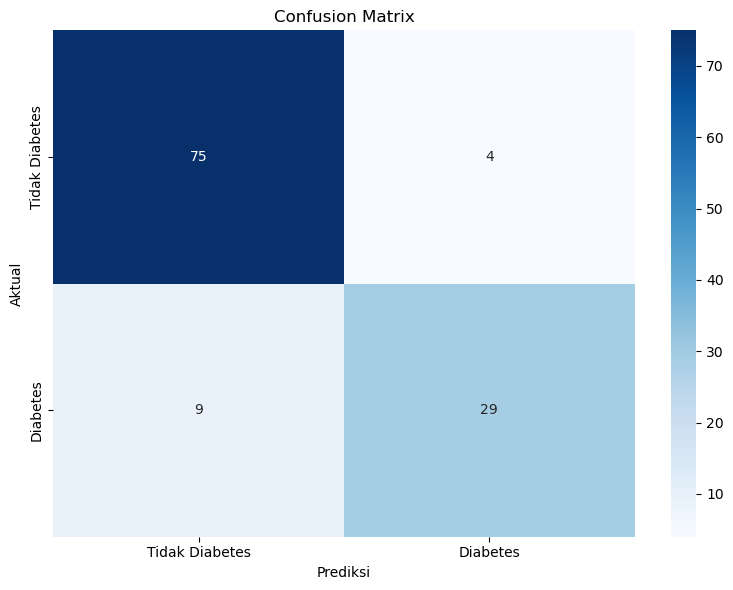

In [19]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Tidak Diabetes', 'Diabetes'],
            yticklabels=['Tidak Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()